In [4]:
import torch
import torchvision
import torchvision.transforms
from torchvision import transforms



In [46]:
res = torchvision.models.resnet50(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/veselovs/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [49]:
modules=list(res.children())[:-1]

res=torch.nn.Sequential(*modules)
for p in res.parameters():
    p.requires_grad = False

In [94]:
im = "/scratch/venia/web2wiki/screenshots/740546.png"

In [95]:
from PIL import Image


im2 = Image.open(im)



In [127]:
dataset[0][0].shape

torch.Size([3, 104, 484])

torch.Size([1, 2048, 1, 1])

In [137]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [400]:
dataset = torchvision.datasets.ImageFolder('/scratch/venia/web2wiki/screenshots', transform=transform)


In [403]:
def forward(k):
    val = dataset[k][0]
    a,b,c = val.shape
    val = val.view(1,a,b,c)
    return res.forward(val)

In [404]:
vecs = []
for i in range(len(dataset)):
    try:
        vecs.append(forward(i))
    except:
        pass

In [405]:
vecs2 = []
for v in vecs:
    vecs2.append(torch.nn.functional.normalize(v).double().view(2048).numpy())

In [406]:
vec_rep = pd.DataFrame(vecs2)

In [407]:
vec_rep

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.016878,0.014693,0.024774,0.009689,0.010056,0.025480,0.025785,0.009238,0.017077,0.017558,...,0.020729,0.015959,0.025535,0.013463,0.021969,0.005407,0.022213,0.006087,0.020038,0.013417
1,0.017732,0.025020,0.023411,0.019836,0.025276,0.025547,0.021821,0.022888,0.019414,0.017549,...,0.020041,0.020801,0.018306,0.019912,0.021602,0.009073,0.020934,0.016162,0.019781,0.014890
2,0.017564,0.025382,0.022166,0.020091,0.028337,0.023429,0.022170,0.023698,0.020049,0.020442,...,0.019346,0.022145,0.021125,0.019529,0.020359,0.008733,0.021463,0.017511,0.020824,0.016300
3,0.016955,0.024452,0.021247,0.020219,0.024716,0.022489,0.021745,0.024918,0.021150,0.020459,...,0.019281,0.021330,0.018646,0.017194,0.021818,0.008916,0.021569,0.015530,0.019319,0.016513
4,0.017564,0.025382,0.022166,0.020091,0.028337,0.023429,0.022170,0.023698,0.020049,0.020442,...,0.019346,0.022145,0.021125,0.019529,0.020359,0.008733,0.021463,0.017511,0.020824,0.016300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17380,0.015993,0.023111,0.023658,0.019632,0.024700,0.022594,0.023714,0.022889,0.019658,0.019440,...,0.018363,0.023857,0.019347,0.019562,0.022300,0.008058,0.019402,0.015575,0.018773,0.015722
17381,0.013424,0.026073,0.021942,0.018693,0.031247,0.009304,0.022369,0.021239,0.014265,0.019823,...,0.032175,0.018891,0.012903,0.018278,0.036102,0.005283,0.020004,0.016079,0.013333,0.004763
17382,0.019239,0.027586,0.024600,0.020031,0.027370,0.024996,0.022348,0.023371,0.021558,0.021012,...,0.021427,0.023054,0.019951,0.019835,0.022054,0.009413,0.018110,0.014846,0.021375,0.014890
17383,0.016862,0.026121,0.023953,0.021541,0.023989,0.025166,0.020056,0.026529,0.019159,0.023074,...,0.019512,0.023200,0.021467,0.016765,0.023115,0.007879,0.017873,0.012969,0.024290,0.015326


In [380]:
from sklearn.cluster import KMeans

In [408]:
km = KMeans(10)

In [409]:
vec_rep["cluster"] = km.fit_predict(vec_rep)


In [383]:
vec_rep["cluster"].unique()

array([0, 3, 4, 7, 6, 8, 5, 1, 2, 9], dtype=int32)

In [413]:

def vis(cluster_id):
    fig, axs = plt.subplots(3,3)
    vals = vec_rep[vec_rep["cluster"] == cluster_id].sample(9, replace=False).index
    i = 0
    for ax in axs.flatten():
        ind = vals[i]
        print(ind)
        show = dataset[ind][0].permute(1,2,0).numpy()
        ax.imshow(show)
        i += 1
    plt.show()

10136
10379
14546
17010
14248
17221
14148
4302
11875


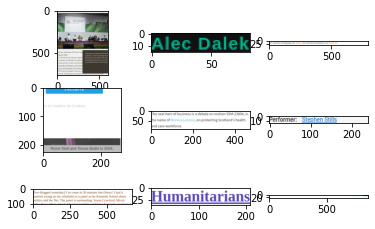

In [421]:
vis(5)

In [ ]:
cs = torch.nn.CosineSimilarity(dim = 0)
dic = {}
for i in range(686):
    dic[i] = {}
for i in range(686):
    print(i)
    d1 = vecs[i][0]
    for j in range(686):
        d2 = vecs[j][0]
        dic[i][j] = cs(d1,d2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [235]:
float(dic[1][2][0])

0.9959760308265686

In [236]:
for i in range(686):
    print(i)
    for j in range(686):
        dic[i][j] = float(dic[i][j][0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [237]:
import pandas as pd
df = pd.DataFrame(dic)

/home/veselovs/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


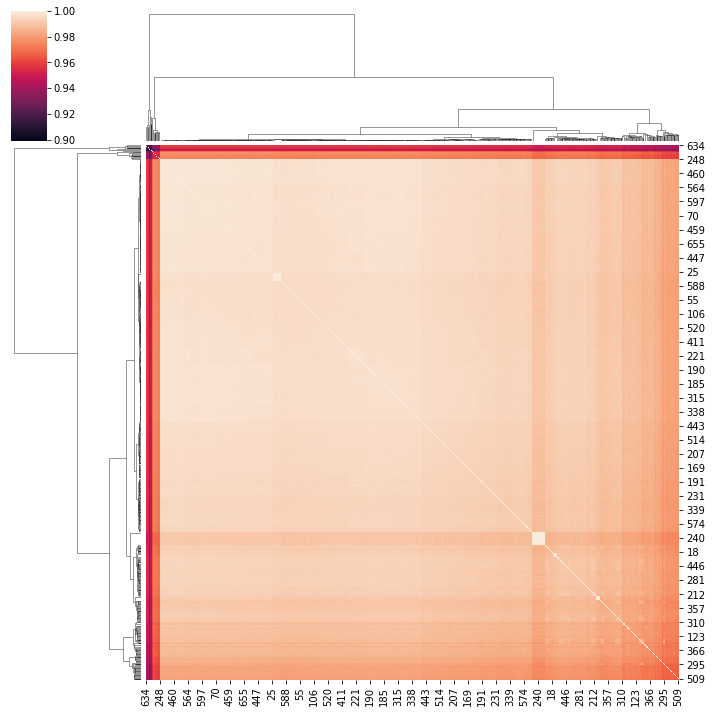

In [239]:
import seaborn as sns

sns.clustermap(df)